In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("data/players.csv")
players <- players |> na.omit(df)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_exp <- players |>
    select(experience, subscribe)

players_exp_count <- players_exp |>
    group_by(experience, subscribe) |>
    count()

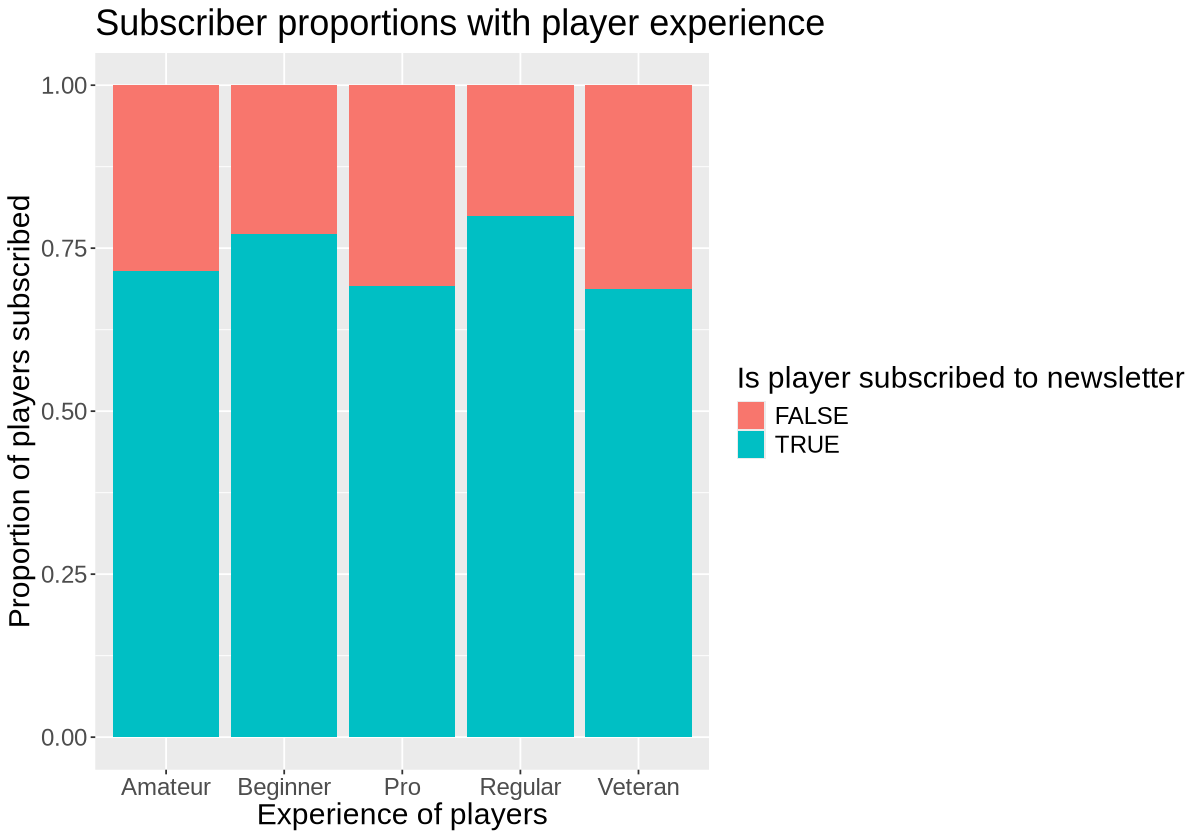

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)
players_exp_plot <- players_exp_count |>
    ggplot(aes(x = experience, y = n, fill = subscribe)) +
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Experience of players", y = "Proportion of players subscribed", title = "Subscriber proportions with player experience", 
            fill = "Is player subscribed to newsletter") +
    theme(text = element_text(size = 18))
players_exp_plot

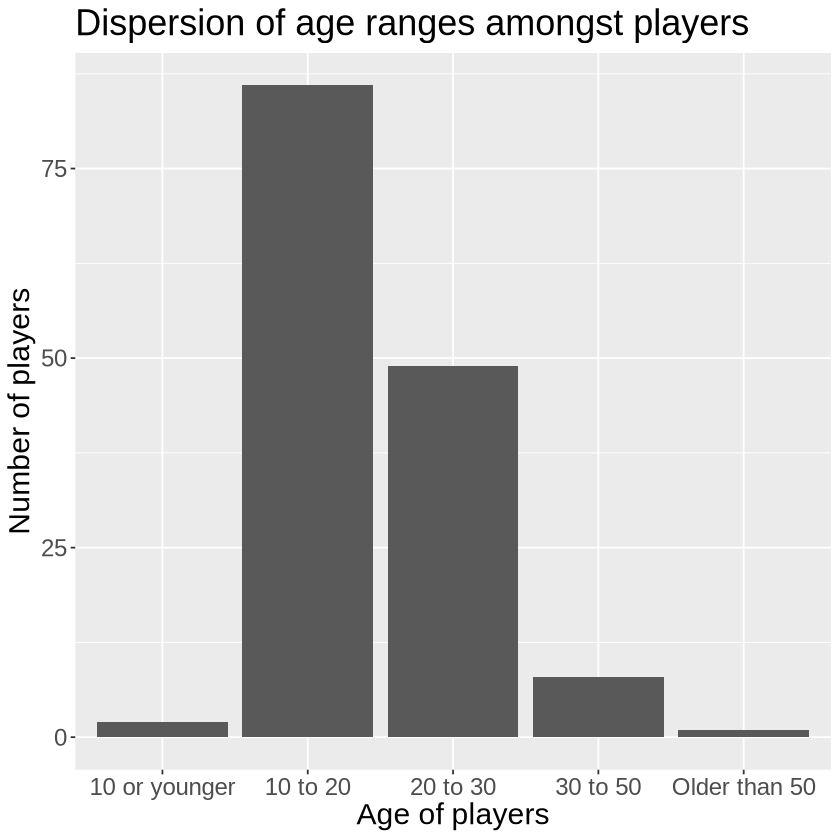

In [6]:
players_age <- players |>
    select(Age, subscribe)

players_age_ranges <- players_age |>
    mutate(
    range = case_when(
      Age <= 10 ~ "10 or younger",
      Age > 10 & Age <= 20 ~ "10 to 20",
      Age > 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 50 ~ "30 to 50",
      Age > 50 ~ "Older than 50" ))

players_age_ranges_count <- players_age_ranges |>
    group_by(range,subscribe) |>
    count()

options(repr.plot.width = 7, repr.plot.height = 7)

players_age_range_count_plot <- players_age_ranges_count |>
    ggplot(aes(x = range, y = n)) +
    geom_bar(stat = 'identity', position = 'dodge') + 
     labs(x = "Age of players", y = "Number of players", title = "Dispersion of age ranges amongst players") +
    theme(text = element_text(size = 18))

players_age_range_count_plot

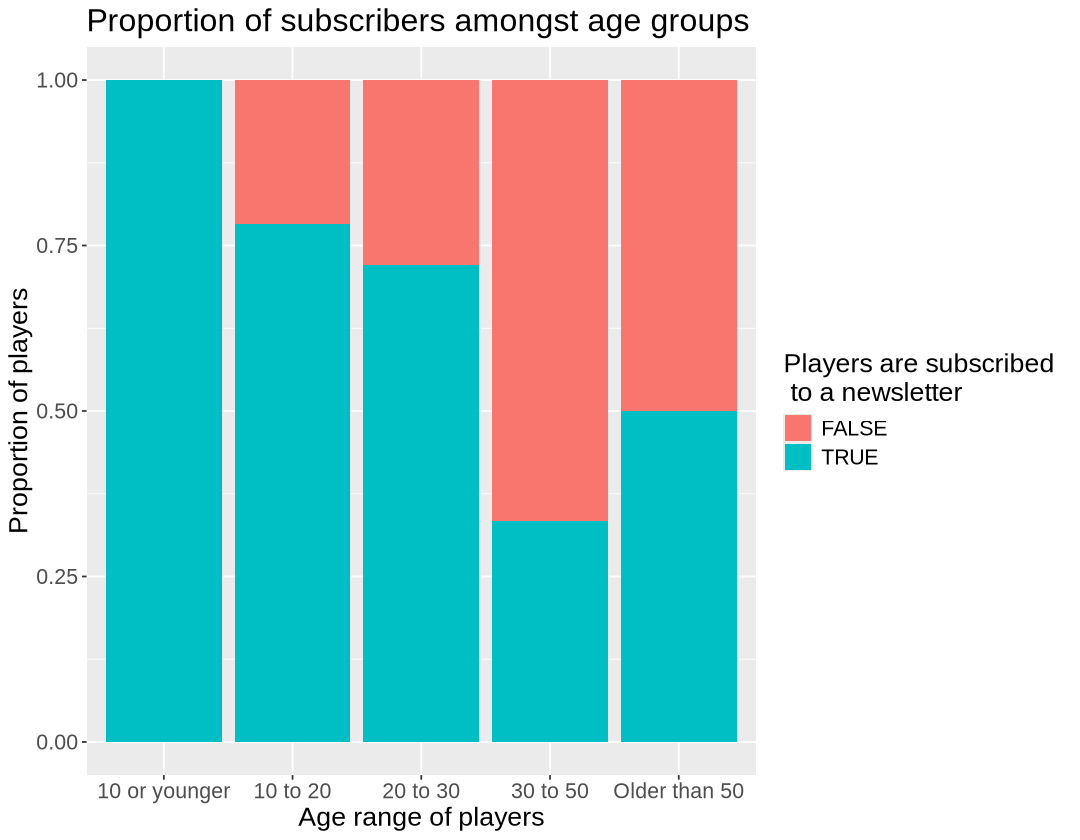

In [7]:
options(repr.plot.width = 9, repr.plot.height = 7)

players_age_ranges_propplot <- players_age_ranges_count |>
    ggplot(aes(x = range, y = n, fill = subscribe)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Age range of players", y = "Proportion of players", title = "Proportion of subscribers amongst age groups",
        fill = "Players are subscribed \n to a newsletter") +
    theme(text = element_text(size = 16))
players_age_ranges_propplot